In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [139]:
# Step 1: Generate Sample Data
np.random.seed(42)
data = {
    "CustomerID": range(1, 101),
    "ServiceQuality": np.random.randint(1, 11, size=100),
    "PricingAndPlans": np.random.choice(['Basic', 'Standard', 'Premium'], size=100),
    "ContractualObligations": np.random.choice(['None', '1 Year', '2 Years'], size=100),
    "CompetitorOffers": np.random.randint(0, 2, size=100),
    "CustomerEngagement": np.random.randint(1, 6, size=100),
    "BillingIssues": np.random.randint(0, 2, size=100),
    "ServiceChanges": np.random.randint(0, 2, size=100),
    "CustomerLifecycleStage": np.random.choice(['New', 'Active', 'At-Risk', 'Churned'], size=100),
    "UsagePatterns": np.random.randint(1, 101, size=100),
    "EconomicFactors": np.random.randint(1, 11, size=100),
    "TechnologyTrends": np.random.randint(1, 11, size=100),
    "CustomerSentiment": np.random.randint(1, 6, size=100),
    "Churn": np.random.randint(0, 2, size=100)
}

df = pd.DataFrame(data)


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
data = {
    "CustomerID": range(1, 101),
    "ServiceQuality": np.random.randint(1, 11, size=100),  # 1 to 10
    "PricingAndPlans": np.random.choice(['Basic', 'Standard', 'Premium'], size=100),
    "ContractualObligations": np.random.choice(['None', '1 Year', '2 Years'], size=100),
    "CompetitorOffers": np.random.randint(0, 2, size=100),  # 0 or 1
    "CustomerEngagement": np.random.randint(1, 6, size=100),  # 1 to 5
    "BillingIssues": np.random.randint(0, 2, size=100),  # 0 or 1
    "ServiceChanges": np.random.randint(0, 2, size=100),  # 0 or 1
    "CustomerLifecycleStage": np.random.choice(['New', 'Active', 'At-Risk', 'Churned'], size=100),
    "UsagePatterns": np.random.randint(1, 101, size=100),  # 1 to 100
    "EconomicFactors": np.random.randint(1, 11, size=100),  # 1 to 10
    "TechnologyTrends": np.random.randint(1, 11, size=100),  # 1 to 10
    "CustomerSentiment": np.random.randint(1, 6, size=100),  # 1 to 5
}

df = pd.DataFrame(data)

# Refine churn based on additional conditions
conditions = [
    (df['ServiceQuality'] <= 4) & (df['CustomerEngagement'] <= 2) & (df['BillingIssues'] == 1),  # Poor service, low engagement, billing issues
    (df['CompetitorOffers'] == 1) & (df['ContractualObligations'] == 'None'),  # Competitor offer and no contract
    (df['CustomerLifecycleStage'].isin(['At-Risk', 'Churned'])),  # Already at-risk or churned customers
    (df['PricingAndPlans'] == 'Basic') & (df['ServiceQuality'] <= 5),  # Basic plan and low service quality
    (df['EconomicFactors'] >= 8) & (df['ServiceQuality'] <= 5),  # Economic stress and low service quality
    (df['UsagePatterns'] <= 20),  # Very low usage
    (df['CustomerSentiment'] <= 2),  # Low sentiment reflects dissatisfaction
]

# Assign churn based on conditions
df['Churn'] = np.select(conditions, [1, 1, 1, 1, 1, 1, 1], default=0)

# Example of how churn factors influence the outcome
print(df[['CustomerID', 'ServiceQuality', 'PricingAndPlans', 'CustomerEngagement', 'BillingIssues', 
          'CompetitorOffers', 'ContractualObligations', 'CustomerLifecycleStage', 
          'UsagePatterns', 'EconomicFactors', 'CustomerSentiment', 'Churn']].head())


In [142]:
df.to_csv("inline_read_data.csv")

In [47]:
df = pd.DataFrame(data)

In [48]:
df.to_csv("data.csv")

In [ ]:
import pandas as pd

# Define the columns
columns = [
    "ServiceQuality", "PricingAndPlans", "ContractualObligations", "CompetitorOffers", 
    "CustomerEngagement", "BillingIssues", "ServiceChanges", "CustomerLifecycleStage", 
    "UsagePatterns", "EconomicFactors", "TechnologyTrends", "CustomerSentiment",
    "PricingAndPlans_Premium", "PricingAndPlans_Standard",	"ContractualObligations_2 Years",	
    "ContractualObligations_None", "CustomerLifecycleStage_At-Risk", "CustomerLifecycleStage_Churned", "CustomerLifecycleStage_New"
]

# Create a single-row DataFrame with actual values
data_with_values = pd.DataFrame([
    [5,	"Standard",	"1 Year", 1, 4,	1, 0,"New", 55,	1, 8, 5,False,False,False,False,False,False,False]
], columns=columns)

if data_with_values['PricingAndPlans'][0]=='Premium':
    data_with_values['PricingAndPlans_Premium'].iloc[0] =True
if data_with_values['PricingAndPlans'][0]=='Standard':
    data_with_values['PricingAndPlans_Standard'].iloc[0] =True
if data_with_values['ContractualObligations'][0]=='2 Years':
    data_with_values['ContractualObligations_2 Years'].iloc[0] =True
if data_with_values['ContractualObligations'][0]=='None':
    data_with_values['ContractualObligations_None'].iloc[0] =True
if data_with_values['CustomerLifecycleStage'][0]=='At-Risk':
    data_with_values['CustomerLifecycleStage_At-Risk'].iloc[0] =True
if data_with_values['CustomerLifecycleStage'][0]=='Churned':
    data_with_values['CustomerLifecycleStage_Churned'].iloc[0] =True
if data_with_values['CustomerLifecycleStage'][0]=='New':
    data_with_values['CustomerLifecycleStage_New'].iloc[0] =True
# Drop the 'BillingIssues' column
data_with_values = data_with_values.drop(['PricingAndPlans','ContractualObligations','CustomerLifecycleStage'], axis=1)


# PricingAndPlans_Premium	PricingAndPlans_Standard	ContractualObligations_2 Years	ContractualObligations_None	CustomerLifecycleStage_At-Risk	CustomerLifecycleStage_Churned	CustomerLifecycleStage_New
data_with_values

# scaler = StandardScaler()
# pred_data_with_values = scaler.fit_transform(data_with_values)



In [197]:
data_with_values

,ServiceQuality,CompetitorOffers,CustomerEngagement,BillingIssues,ServiceChanges,UsagePatterns,EconomicFactors,TechnologyTrends,CustomerSentiment,PricingAndPlans_Premium,PricingAndPlans_Standard,ContractualObligations_2 Years,ContractualObligations_None,CustomerLifecycleStage_At-Risk,CustomerLifecycleStage_Churned,CustomerLifecycleStage_New
0,5,1,4,1,0,55,1,8,5,False,True,False,False,False,False,True


In [ ]:
y = np.array([0])
 
ser = pd.Series(y)
smote = SMOTE(random_state=42)
data_with_values, y_ser = smote.fit_resample(data_with_values, ser)

In [195]:
import joblib
scaler = StandardScaler()
pred_data_with_values,y_ser = scaler.fit_transform(data_with_values,y_ser)

In [176]:
from keras.models import load_model
model = load_model('best_demo_customer_churn_model_nn.h5')

In [ ]:
prediction = model.predict(data_with_values)
churn_probability = prediction[0][0]
    
# # Display the prediction result
# st.write(f"Churn Probability: {churn_probability:.4f}")
if churn_probability < 0.5:
    print("The customer is likely to churn.")
else:
    print("The customer is unlikely to churn.")

In [178]:
prediction[0][0]

0.17505708

In [143]:
# Step 2: Preprocess the Data
df = pd.get_dummies(df, columns=['PricingAndPlans', 'ContractualObligations', 'CustomerLifecycleStage'], drop_first=True)

X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']


In [144]:
df

,CustomerID,ServiceQuality,CompetitorOffers,CustomerEngagement,BillingIssues,ServiceChanges,UsagePatterns,EconomicFactors,TechnologyTrends,CustomerSentiment,Churn,PricingAndPlans_Premium,PricingAndPlans_Standard,ContractualObligations_2 Years,ContractualObligations_None,CustomerLifecycleStage_At-Risk,CustomerLifecycleStage_Churned,CustomerLifecycleStage_New
0,1,7,1,1,1,0,47,1,8,5,0,False,True,False,False,False,False,True
1,2,4,1,4,0,1,25,5,1,5,1,False,False,False,False,True,False,False
2,3,8,1,5,1,1,66,4,3,5,0,True,False,True,False,False,False,True
3,4,5,1,4,0,0,10,10,10,3,1,True,False,False,True,True,False,False
4,5,7,1,1,0,1,56,8,9,3,1,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,10,0,1,0,1,97,2,6,5,0,False,False,False,True,False,False,False
96,97,9,1,4,0,1,88,4,8,5,0,False,False,True,False,False,False,False
97,98,7,0,3,0,1,79,6,9,2,1,True,False,True,False,True,False,False
98,99,9,1,4,1,1,30,2,5,4,1,False,False,False,False,False,True,False


In [182]:
X

,ServiceQuality,CompetitorOffers,CustomerEngagement,BillingIssues,ServiceChanges,UsagePatterns,EconomicFactors,TechnologyTrends,CustomerSentiment,PricingAndPlans_Premium,PricingAndPlans_Standard,ContractualObligations_2 Years,ContractualObligations_None,CustomerLifecycleStage_At-Risk,CustomerLifecycleStage_Churned,CustomerLifecycleStage_New
0,7,1,1,1,0,47,1,8,5,False,True,False,False,False,False,True
1,4,1,4,0,1,25,5,1,5,False,False,False,False,True,False,False
2,8,1,5,1,1,66,4,3,5,True,False,True,False,False,False,True
3,5,1,4,0,0,10,10,10,3,True,False,False,True,True,False,False
4,7,1,1,0,1,56,8,9,3,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10,0,1,0,1,97,2,6,5,False,False,False,True,False,False,False
96,9,1,4,0,1,88,4,8,5,False,False,True,False,False,False,False
97,7,0,3,0,1,79,6,9,2,True,False,True,False,True,False,False
98,9,1,4,1,1,30,2,5,4,False,False,False,False,False,True,False


In [183]:
data_with_values

,ServiceQuality,CompetitorOffers,CustomerEngagement,BillingIssues,ServiceChanges,UsagePatterns,EconomicFactors,TechnologyTrends,CustomerSentiment,PricingAndPlans_Premium,PricingAndPlans_Standard,ContractualObligations_2 Years,ContractualObligations_None,CustomerLifecycleStage_At-Risk,CustomerLifecycleStage_Churned,CustomerLifecycleStage_New
0,5,1,4,1,0,55,1,8,5,False,True,False,False,False,False,True


In [185]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [201]:
type(y)

pandas.core.series.Series

In [187]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)


In [147]:
import joblib
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [148]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [149]:
from tensorflow.keras.layers import Dropout
# Step 3: Define a function to create the model
def create_model(optimizer='adam', neurons=32,dropout_rate = 0.5):
    # model = Sequential()
    # model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    # model.add(Dense(neurons // 2, activation='relu'))
    # model.add(Dense(1, activation='sigmoid'))
    # model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))  # Dropout added
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [150]:
# Step 4: Hyperparameter tuning (manually)
best_accuracy = 0
best_params = {}


In [ ]:
# Define parameter grid
neurons_options = [16, 32, 64]
optimizers = ['adam', 'rmsprop']
batch_sizes = [5, 10, 20]
epochs_options = [50, 100]
import joblib

# neurons_options = [64]
# optimizers = ['adam']
# batch_sizes = [5]
# epochs_options = [100]

for neurons in neurons_options:
    for optimizer in optimizers:
        for batch_size in batch_sizes:
            for epochs in epochs_options:
                # Create model
                model = create_model(optimizer=optimizer, neurons=neurons)
                # Fit model
                model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)
                # Evaluate model
                y_pred = (model.predict(X_test) > 0.5).astype("int32")
                accuracy = accuracy_score(y_test, y_pred)
                print(f'Neurons: {neurons}, Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}, Accuracy: {accuracy:.4f}')
                # Check if this is the best model so far
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'neurons': neurons,
                        'optimizer': optimizer,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }



In [152]:
# Print best parameters and accuracy
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'neurons': 16, 'optimizer': 'adam', 'batch_size': 10, 'epochs': 100}
Best Accuracy: 0.9791666666666666


In [153]:
# Step 5: Final evaluation using the best model
best_model = create_model(optimizer=best_params['optimizer'], neurons=best_params['neurons'])
best_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=best_params['epochs'], verbose=0)

y_pred = (best_model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


C:\Users\Meghana-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Confusion Matrix:
 [[24  0]
 [ 2 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.92      0.96        24

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [68]:
pred = (best_model.predict(x_0) > 0.5).astype("int32")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [69]:
print(pred)

[[0]]


In [155]:
# Save the best model
best_model.save('best_demo_customer_churn_model_nn.h5')


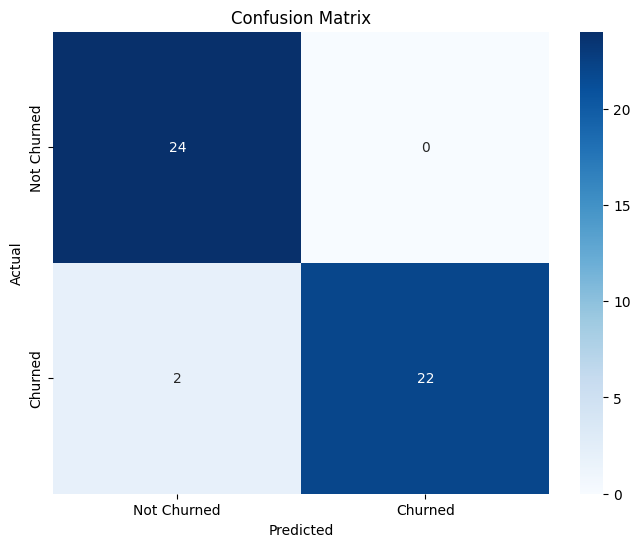

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()



<Figure size 1000x600 with 0 Axes>

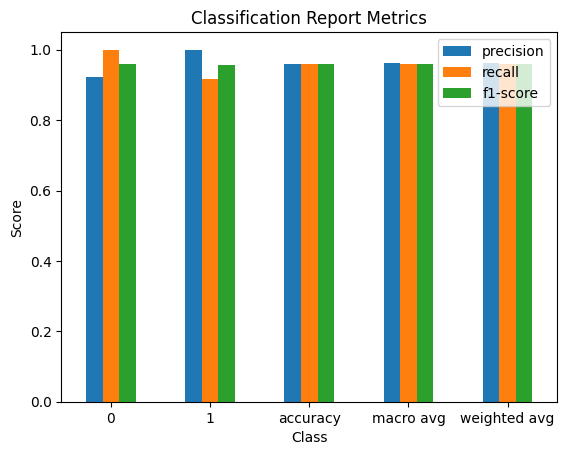

In [157]:
# Plotting the classification metrics
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()
